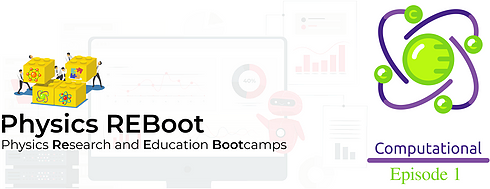

#***El Péndulo Simple***

A continuación se presenta la resolución de las ecuaciones diferenciales asociadas al sistema físico del péndulo simple o péndulo ideal.

El péndulo simple consta de una cuerda de longitud **l** (con masa despreciable) fijo en el extremo superior y con una masa puntual **m** (de dimensión despreciable) en el extremo inferior:

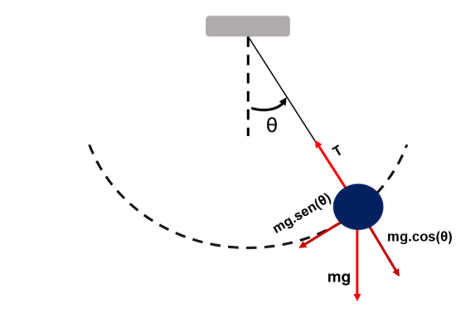

En el sistema hay dos fuerzas involucradas, la tensión **T** y el peso **mg**. 

Para escribir las ecuaciones de movimiento es necesario primero, descomponer las fuerzas de modo de que sean paralelas o perpendiculares al movimiento. En este caso el movimiento esta definido a lo largo de la circunferencia y el eje perpendicular corresponde a la dirección de la cuerda. 

Haciendo uso del diagrama de cuerpo libre presentado anteriormente, y la segunda ley de Newton, escribimos la ecuación correspondiente a la aceleración tangencial:

$F_{Tang}= -mgsen(\theta ) = ma_{Tang}$

donde  $a_{Tang} = l.\ddot{\theta}$

Sustituyendo la segunda ecucación dentro de la primera obtenemos:

$ -gsen(\theta ) = l.\ddot{\theta}$

Con esta información, podemos excribir las ecuaciones de movimiento para definir el sistema, donde:

$ \dot{\theta}= \frac{d\theta}{dt} = \omega $

$ \ddot{\theta}= \frac{d\omega}{dt} = -mg.sen(\theta)/l $

En esta ocasión, nuestra tarea es:

* Crear nuestra propia implementación en Python del *Pendulo Simple* usando la ecuación diferencial presentada anteriormente.

* Ilustrar graficamente la evolución del sistema en función del tiempo




Empezemos por cargar las librerias y paquetes que usaremos:

In [8]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

**Solve_ivp** requiere como input una función que consiste en las ecuaciones diferenciales a ser resueltas en forma de vector:

El primer paso consiste en definir las variables que van a ser determinadas: 

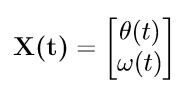

Luego se define la función de sus derivadas, $\dot{X(t)} = f(t,X)$ donde **t** es la variable independiente y **X** el vector que definimos anteriormente. 

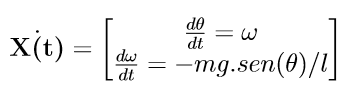

Finalmente, se indican los valores iniciales, de igual manera en forma vectorial:

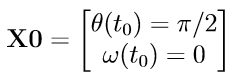

La función se define:

In [12]:
#Dado que la ecuación diferencial del pendulo simple es de segundo orden, la reducimos a dos ODE de primer orden.

def ode_func(theta,t,g,l):
	theta1=theta[0]
	theta2=theta[1]
	dtheta1_dt=theta2
	dtheta2_dt=-((g/l)*np.sin(theta1))
	dtheta_dt=[dtheta1_dt,dtheta2_dt]
	return dtheta_dt

g=9.8 #Gravedad
l=1 #Longitud

#Definimos las condiciones iniciales para el plot
theta_0=[0,3]
#Definimos el tiempo para la gráfica
t=np.linspace(0,20,200)
#Resolvemos con odeint
theta = odeint(ode_func,theta_0,t,args=(g,l))

Finalmente graficamos la solución:


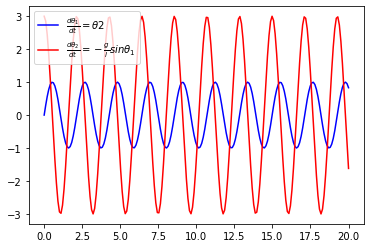

In [14]:
plt.figure(1)
plt.plot(t,theta[:,0],'b',label=r'$\frac{d\theta_1}{dt}=\theta2$')
plt.plot(t,theta[:,1],'r',label=r'$\frac{d\theta_2}{dt}=-\frac{g}{l}sin\theta_1$')
plt.legend(loc='best')
plt.show()
